In [54]:
from gensim.models import KeyedVectors
import json

# Word2Vecモデルのロード
model = KeyedVectors.load_word2vec_format('model_neo_nouns_only.bin', binary=True)

with open('word_pairs.json', 'r', encoding='utf-8') as f:
    word_pairs = json.load(f)
# print(word_pairs)
# print(type(word_pairs))

In [67]:
# コサイン類似度のリストを生成
cosine_similarities = []
for word1, word2 in word_pairs:
    if word1 in model.key_to_index and word2 in model.key_to_index:
        similarity = model.similarity(word1, word2)
        vector_diff = model[word1] - model[word2]
        cosine_similarities.append((word1, word2, 1-similarity, vector_diff))
        # cosine_similarities.append(similarity)
    else:
        cosine_similarities.append((word1, word2, None))  # 単語がモデルにない場合

cosine_similarities_dropped = []
for i in cosine_similarities:
    if i[2] != None:
        cosine_similarities_dropped.append(i)
print(cosine_similarities_dropped)

# cosine_similaritiesには各単語ペアのコサイン類似度が格納されています


[('冬休み', '春休み', 0.27470630407333374, array([ 0.03294899,  0.06281   ,  0.23451003,  0.37906998,  0.352649  ,
       -0.29283   , -0.0511132 ,  0.24429   , -0.01327997, -0.25471   ,
        0.182129  ,  0.11729999, -0.20324   , -0.43473998, -0.17914002,
        0.00180399, -0.01113999, -0.227121  , -0.14387   ,  0.20944   ,
       -0.39666003,  0.04946999, -0.02787   ,  0.14713001, -0.235271  ,
       -0.34212002, -0.2964969 , -0.3249    , -0.612201  , -0.003875  ,
       -0.24554698,  0.16579   ,  0.047478  , -0.08338   , -0.20585999,
        0.1151827 , -0.32033002, -0.12507   , -0.34758997, -0.14798   ,
       -0.27029   , -0.0533523 , -0.059052  , -0.30386502,  0.00922999,
        0.12236002,  0.01887   ,  0.37202   , -0.30712998, -0.1291    ,
       -0.120406  ,  0.28335   , -0.03439999, -0.237364  , -0.363787  ,
       -0.394174  , -0.3101959 ,  0.254878  ,  0.20398   , -0.39679003,
        0.04775999, -0.21908002, -0.10749201,  0.02216999,  0.018143  ,
       -0.11387001, -0.2777

In [56]:
similar_lst = []
for i in cosine_similarities:
    if i[2] != None:
        similar_lst.append(i[2])

In [57]:
similar_lst

[0.27470630407333374,
 0.5481859743595123,
 0.8449176996946335,
 0.33744072914123535,
 0.6060187518596649,
 0.5773889720439911,
 0.485701322555542,
 0.5300141870975494,
 0.1892249584197998,
 0.4830283522605896,
 0.7268284857273102,
 0.3817218542098999,
 0.4269596338272095,
 0.39887577295303345,
 0.4118969440460205,
 0.4696449041366577,
 0.3507723808288574,
 0.6893905997276306,
 0.42940956354141235,
 0.6696195304393768,
 0.3001864552497864,
 0.4305047392845154,
 0.7623856663703918,
 0.6719545722007751,
 0.29283225536346436,
 0.8625825792551041,
 0.44514960050582886,
 0.5518676340579987,
 0.5589286684989929,
 0.26056385040283203,
 0.6581672132015228,
 0.6768714487552643,
 0.7566930800676346,
 0.49357813596725464,
 0.5693272352218628,
 0.4385613203048706,
 0.3915982246398926,
 0.29803788661956787,
 0.2460421323776245,
 0.2845444083213806,
 0.4741264581680298,
 0.2966540455818176,
 0.4676699638366699,
 0.4118969440460205,
 0.5902432501316071]

(array([2., 7., 3., 9., 6., 7., 2., 5., 2., 2.]),
 array([0.18922496, 0.25656072, 0.32389648, 0.39123224, 0.45856801,
        0.52590377, 0.59323953, 0.66057529, 0.72791106, 0.79524682,
        0.86258258]),
 <BarContainer object of 10 artists>)

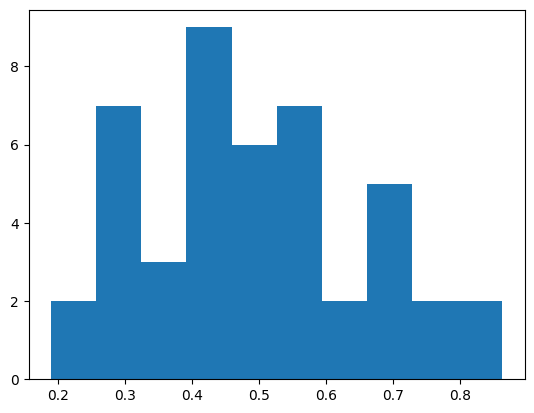

In [58]:
import matplotlib.pyplot as plt
plt.hist(similar_lst, bins=10)

/tmp/ipykernel_86106/242648590.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


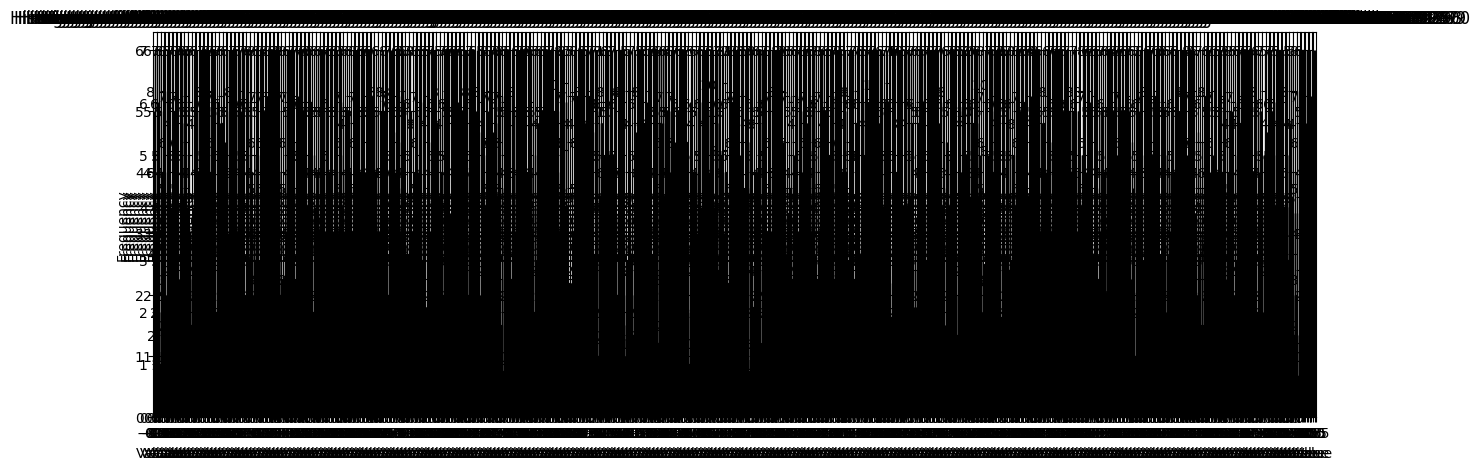

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# すべてのベクトル差を結合して行列を形成
# diff_lst = [vec_diff for _, _, _, vec_diff in cosine_similarities_dropped]
vector_diff_matrix = np.vstack([vec_diff for _, _, _, vec_diff in cosine_similarities_dropped])

# 各列（元のベクトルの要素ごと）に対してヒストグラムを描画
num_columns = vector_diff_matrix.shape[1]
plt.figure(figsize=(15, 5))

for i in tqdm(range(num_columns)):
    plt.subplot(1, num_columns, i + 1)
    plt.hist(vector_diff_matrix[:, i], bins=20, edgecolor='black')
    plt.title(f'Histogram of Vector Diff Element {i + 1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [60]:
print(vector_diff_matrix)

[[0.1 0.2 0.3]
 [0.2 0.3 0.4]]


('風呂掃除', '食器洗い', None)